# Numerical Optimization With Python

*Contributors: Dr Yae GABA; Dr Aurelle TCHAGNA; Mr. Domini LEKO*

## Pre-Course 5: Numerical Differentiation


## Learning objectives:


* Learn about finite difference approximations to derivatives


* Be able to implement forward and central difference methods


* Calculate higher-order derivatives


* Solve simple ODEs using the finite difference method

In [1]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Differentiation (or taking a derivative) - the continuous definition


The classical definition of the derivative of a function $f$ at a point $x_0$ is of course given by:

 $$f'(x_0)=\lim_{h\rightarrow 0} \frac{f(x_0+h)-f(x_0)}{h}. $$
 
 
**Notation** 
 
1. Note that the following are all equivalent mathematical ways of writing the derivative of the function $f$ with respect to (w.r.t.) $x$ and evaluated at the location $x_0$:
 
 $$  f'(x_0) = \frac{df}{dx}(x_0) = \left.\frac{df}{dx}\right|_{x_0}. $$
 
 
2. We're using $h$ here to denote a small (potentially infinitesimally small) increment to the $x$ coordinate, as is common. But note that in the literature $\Delta x$ is commonly used to mean the same thing. Also, of course for finite $h$ there is significant overlap here with the mesh spacing in a numerical approximation, as we shall see below, and so $\Delta x$ is also used.

# Finite differences 

Finite differences are a class of approximation method for estimating/computing derivatives of functions.


In this lecture we shall largely focus on the case of functions of a single spatial dimension $x$ (e.g. $\;f\equiv f(x)\;$ or $\;u\equiv u(x)$), but these ideas extend for time derivatives (initial-value problems - IVPs - at end of this lecture) and multiple spatial dimensions (PDEs).


Approximations to the derivatives of a function can be computed by using weighted sums of function evaluations at a number of points.


## The forward difference

For example, we can turn the formal definition of a derivative given above into an approximation rule by replacing the limit as $h$ approaches zero (i.e. the $\text{lim}_{h\rightarrow\infty}$) with a small but finite $\Delta x$ value:

$$ f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\;\;\;\; \Delta x>0. $$

Since this approximate gradient method uses values of $x$ greater than $x_0$ ($\Delta x>0$), this algorithm is known as the **forward difference method**. 

The figure below illustrates this approximation. 

In the figure the derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line -- if the second (and/or higher) derivative of the function is large then this approximation might not be very good, unless you make $\Delta x$ very small.

You can see this yourself by varying the value of $\Delta x$ in the code below.

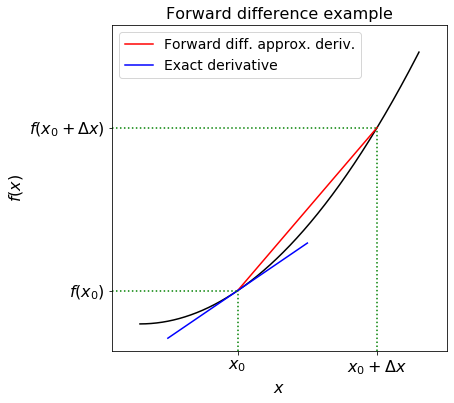

In [10]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Forward difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the 'exact' solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
x0 = 0.35
dx = 0.5
x1 = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([x0, x1], [f(x0), f(x1)], 'r', label = 'Forward diff. approx. deriv.')
# plot a line representing the exact derivative (given by function f(.)) at x=x0
h = dx/2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((x0, x1))
ax1.set_xticklabels(('$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([x0, x0], [-0.1, f(x0)], 'g:')
ax1.plot([x1, x1], [-0.1, f(x1)], 'g:')
ax1.set_yticks((f(x0), f(x1)))
ax1.set_yticklabels(('$f(x_0)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, x0], [f(x0), f(x0)], 'g:')
ax1.plot([-0.1, x1], [f(x1), f(x1)], 'g:')
ax1.legend(loc='best', fontsize=14);

## Taylor series to estimate accuracy

We can use a [Taylor series expansion](http://mathworld.wolfram.com/TaylorSeries.html), or *Taylor series analysis*, to estimate the accuracy of the method. 

Recall that Taylor series in one dimension tells us that we can approximate the value of the function at a location in terms of its value, and value of its derivative, at a nearby point:

\begin{align*}
f(x_0+h) & = f(x_0) + hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \frac{h^3}{3!}f'''(x_0) + \ldots\\[5pt]
& = f(x_0)+hf'(x_0) + \frac{h^2}{2!}f''(x_0) + \mathcal{O}(h^3),
\end{align*}
 
where $\mathcal{O}(h^3)$ represents the collection of terms that are third-order in $h$ or higher.

We call this the Taylor series expansion *about (or around) the point $x_0$* (since all the functions in the expansion on the RHS are evaluated at this point).

An equivalent way of writing this expansion would of course be (just define $x$ to be $x_0+h$)

$$f(x) = f(x_0) + (x - x_0) f'(x_0) + \frac{(x - x_0)^2}{2!} f''(x_0) + \frac{(x - x_0)^3}{3!} f'''(x_0) + \mathcal{O}((x - x_0)^4).$$


#### Taylor series example

*Wikipedia image: The exponential function (in blue), and the sum of the first (n + 1) terms of its Taylor series expansion around the point 0 (in red).*

<img src="https://upload.wikimedia.org/wikipedia/commons/6/62/Exp_series.gif" width=200x>


More terms equate with a better approximation valid a larger distance from $x_0$.

If we rearrange this expression to isolate the gradient term $f'(x_0)$ on the left hand side, we find:

 $$ hf'(x_0)=f(x_0+h)-f(x_0) +O(h^2) $$
 
and therefore, by dividing through by $h$,
 
 $$ f'(x_0)=\frac{f(x_0+h)-f(x_0)}{h}+O(h) $$

As we are left with $O(h)$ at the end, we know that the forward difference method is first-order (i.e. $h^1$) -- as we make the spacing $h$ smaller we expect the error in our derivative to fall linearly.

#### Order of convergence - higher generally better

For general numerical methods we generally strive for something better than this - if we halve our $h$ we would like our error to drop super-linearly: i.e. by a factor of 4 (second-order method) or 8 (third-order method) or more.

But note that as we shall see when we start to solve some differential equations, reducing the size of $h$ (i.e. refining our computational mesh) does generally come at the expense of doing more work overall.  So there is a trade-off in accuracy vs cost.

## <span style="color:blue">Exercise 2.1: Compute first derivative using forward differencing</span>

Use the forward difference scheme to compute an approximation to $f'(2.36)$ from the following data:

$f(2.36) = 0.85866$

$f(2.37) = 0.86289$

You should get an answer of 0.423.

## The central difference

In an attempt to derive a more accurate method we use two Taylor series expansions; one in the positive $x$ direction from $x_0$, and one in the negative direction. 

Since we hope to achieve better than first-order accuracy, we include an extra term in the series:

\begin{align*}
f(x_0+ \Delta x) &= f(x_0)+\Delta x f'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3)\\[5pt]
f(x_0- \Delta x) &= f(x_0)- \Delta x f'(x_0)+\frac{(-\Delta x)^2}{2}f''(x_0) + \mathcal{O}((-\Delta x)^3).
\end{align*}

Using the fact that $(-\Delta x)^2=\Delta x^2$ and the absolute value signs from the definition of $\mathcal{O}$ (that is we don't worry about signs when using the $\mathcal{O}$ notation), this is equivalent to:

\begin{align*} 
f(x_0+\Delta x) &= f(x_0)+\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3),\\[5pt]
f(x_0-\Delta x) &= f(x_0)-\Delta xf'(x_0)+\frac{\Delta x^2}{2}f''(x_0) + \mathcal{O}(\Delta x^3).
\end{align*}

Remember that we are looking for an expression for $f'(x_0)$. Noticing the sign change between the derivative terms in the two equations, we subtract the second equation from the first to give:

$$ f(x_0+\Delta x)-f(x_0-\Delta x)=2\Delta xf'(x_0) + \mathcal{O}(\Delta x^3).$$

Finally, we can rearrange to get an expression for $f'(x_0)$:

$$ f'(x_0)=\frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x} + O(\Delta x^2),$$

which, contrary to the first-order forward and backward differences seen above, is an approximation to the derivative that is second-order accurate.

By considering an interval symmetric about $x_0$, we have created a second-order approximation for the derivative of $f$. 

This symmetry gives the scheme its name: the central difference method. 

The figure below illustrates this scheme. The derivative is approximated by the slope of the red line, while the true derivative is the slope of the blue line.  

Even without the analysis above it's hopefully clear visually why this should in general give a lower error than both the forward and backward difference approaches. 

The analysis of the two methods does tell us that as we halve $h$ the error should drop by a factor 4 rather than the 2 we get for the first-order forward or backward differencing.

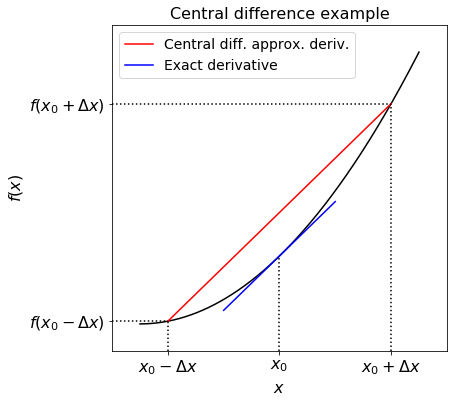

In [3]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 1.1)
# ax.grid(True)
ax1.set_title('Central difference example', fontsize=16)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)$', fontsize=16)
# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

# define our example function and its exact derivative

def f(x):
    return x**2

def df(x):
    return 2 * x

# plot the exact solution
ax1.plot(x, f(x), 'k')
# choose and plot two x locations to take the difference between
dx = 0.4
x0 = 0.5
xl = x0 - dx
xr = x0 + dx
# plot a line representing the discrete derivative
ax1.plot([xl, xr], [f(xl), f(xr)], 'r', label = 'Central diff. approx. deriv.')
# plot a line representing the exact derivative at x=x0
h = dx / 2
ax1.plot([x0 - h, x0 + h], [f(x0) - h * df(x0), f(x0) + h * df(x0)], 'b', label = 'Exact derivative')
# add some axes labels and lines etc
ax1.set_xticks((xl, x0, xr))
ax1.set_xticklabels(('$x_0-\Delta x$', '$x_0$', '$x_0+\Delta x$'), fontsize=16)
ax1.plot([xl, xl], [-0.1, f(xl)], 'k:')
ax1.plot([xr, xr], [-0.1, f(xr)], 'k:')
ax1.plot([x0, x0], [-0.1, f(x0)], 'k:')
ax1.set_yticks((f(xl), f(xr)))
ax1.set_yticklabels(('$f(x_0-\Delta x)$', '$f(x_0+\Delta x)$'), fontsize=16)
ax1.plot([-0.1, xl], [f(xl), f(xl)], 'k:')
ax1.plot([-0.1, xr], [f(xr), f(xr)], 'k:')
ax1.legend(loc='best', fontsize=14);

## <span style="color:blue">Exercise 2.2: Compute first derivative using central differencing</span>

Use the data below to compute $f'(0.2)$ using central differencing:

$$f(0.1) = 0.078348$$
$$f(0.2) = 0.138910$$
$$f(0.3) = 0.192916$$

You should get 0.57284

## <span style="color:blue">Example: Write a function to perform numerical differentiation</span>

As covered above, the expression

$$\frac{f(x+\Delta x) - f(x-\Delta x)}{2\Delta x},$$

can be used to find an approximate derivative of the function $f(x)$ provided that $\Delta x$ is appropriately small. 

Let's write a function `diff(f, x, dx = 1.0e-6)` that returns the approximation of the derivative of a mathematical function represented by a Python function `f(x)`.

Let's apply the above formula to differentiate $\,f(x) = e^x\,$ at $\,x = 0$, $\,f(x) = e^{−2x}\,$ at $\,x = 0$, $\,f(x) = \cos(x)\,$ at $\,x = 2\pi$, and $\,f(x) = \ln(x)\,$ at $\,x = 1\,$, i.e. functions we know the exact derivative of.

In each case, using $\,\Delta x = 0.01$, let's write out the error, i.e. the difference between the exact derivative and the result of the formula above.

In [14]:
def diff(f, x, dx=1e-6):
    numerator = f(x + dx) - f(x - dx)
    derivative = numerator / ( 2.0 * dx )
    return derivative

dx = 0.01
x = 0
f = np.exp
derivative = diff(f, x, dx)
print("The approximate derivative of exp(x) at x = 0 is: %f. The error is %f."
      % (derivative, abs(derivative - 1)))
x = 0

def g(x):
    return np.exp(-2*x)

derivative = diff(g, x, dx)
print('The approximate derivative of exp(-2*x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - (-2.0))))

x = 2*np.pi
f = np.cos
derivative = diff(f, x, dx)
print('The approximate derivative of cos(x) at x = 2*pi is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 0)))

x = 1
f = np.log
derivative = diff(f, x, dx)
print('The approximate derivative of ln(x) at x = 0 is: {0:.5f}.  The error is {1:.5f}.'
        .format(derivative, abs(derivative - 1)))

The approximate derivative of exp(x) at x = 0 is: 1.000017. The error is 0.000017.
The approximate derivative of exp(-2*x) at x = 0 is: -2.00013.  The error is 0.00013.
The approximate derivative of cos(x) at x = 2*pi is: 0.00000.  The error is 0.00000.
The approximate derivative of ln(x) at x = 0 is: 1.00003.  The error is 0.00003.


## <span style="color:blue">Exercise 2.3: Compute the derivative of $\sin(x)$</span>

Compute 

$$\frac{d(\sin x)}{dx}\qquad\textrm{at}\qquad x = 0.8$$

using (a) forward differencing and (b) central differencing. 

Write some code that evaluates these derivatives for decreasing values of $h$ (start with $h=1.0$ and keep halving) and compare the values against the exact solution.

Plot the convergence of your two methods.

You should get something that looks like this

!["Convergence plot"](images/fd_cd_convergence.png)

## Approximating second derivatives

Numerical differentiation may be extended to the second derivative by noting that the second derivative is the derivative of the first derivative. 

That is, if we define a new function $g$ where:

$$ g(x) = f'(x), $$

then

$$ f''(x) = g'(x), $$

a consequence of this (obvious) observation is that we can just apply our differencing formula twice in order to achieve a second derivative.

And so on for even higher  derivatives!

We have noted above that the central difference method, being second-order accurate, is superior to the forward difference method so we will choose to extend that.

In order to calculate $f''(x_0)$ using a central difference method, we first calculate $f'(x)$ for each of two half intervals, one to the left of $x_0$ and one to the right:

\begin{align*} 
f'\left(x_0+\frac{\Delta x}{2}\right) & \approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x},\\[10pt]
f'\left(x_0-\frac{\Delta x}{2}\right) & \approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}.
\end{align*}

[NB. We make this choice since we have a vision to ultimately end up with an approximation that utilises a three-point stencil].

Of course the formula on the RHS of these two equations we recognise from above as first-order forward and backward differences, if we were to consider the derivatives on the LHS to be evaluated at $x_0$. 

However, by considering the LHS at $x_0\pm \Delta x/2$ they are in actual fact second-order *central* differences where the denominator of the RHS is $2\times (\Delta x/2)$.

[This may seem a bit weird, but is just showing that there are sometimes more than one way to interpret a numerical approximation].

We can now calculate the second derivative making use of these two values within another central difference. 

But we must note again that these two values are telling us $f'(x)$ at the points $x_0\pm{\Delta x}/{2}$, which are only $\Delta x$ rather than $2\Delta x$ apart. 
We must remember this in the denominator of the central difference formula to yield

\begin{align}
    f''(x_0)&\approx\frac{f'(x_0+\frac{\Delta x}{2})-f'(x_0-\frac{\Delta x}{2})}{\Delta x}\\[5pt]
    &\approx\frac{\frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}-\frac{f(x_0)-f(x_0-h)}{\Delta x}}{\Delta x}\\[5pt]
    &\approx\frac{f(x_0+\Delta x)-2f(x_0)+f(x_0-\Delta x)}{\Delta x^2}.
\end{align}

## <span style="color:blue">Exercise 2.4: Compute second derivative</span>

Calculate the second derivative $f''$ at $x = 1$ using the data below:

$f(0.84) = 0.431711$

$f(0.92) = 0.398519$

$f(1.00) = 0.367879$

$f(1.08) = 0.339596$

$f(1.16) = 0.313486$

You should get 0.36828

## Aside: Non-central differencing and differentiation by polynomial fit

In this particular case we were given more data than we actually used. An alternative approach would be to use *non-centred differencing*, e.g. the following is also a valid approximation to the second derivative

$$
\begin{align}
    f''(x_0)\approx\frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+f(x_0)}{\Delta x^2}
\end{align}$$

This can come in handy if we need to approximate the value of derivatives at or near to a boundary where we don't have data beyond that boundary.

If we wanted to use all of this data, an alternative would be to fit a polynomial to this data, and then differentiate this analytical expression exactly to approximate the derivative at any point between 0.84 and 1.16 (recalling that extrapolation is dangerous).

## Numerical methods for ODEs

One of the most important applications of numerical mathematics in the sciences is the numerical solution of ordinary differential equations (ODEs). This is a vast topic which rapidly becomes somewhat advanced, so we will restrict ourselves here to a very brief introduction to the solution of first order ODEs. 

Suppose we have the general first-order ODE:

\begin{align}
u'(t)&=f(u(t),t) \\
u(t_0)&=u_0
\end{align}

[Notation: For $u\equiv u(t)$, $\frac{du}{dt}=u'=\dot{u}$.]

That is, the derivative of $u$ with respect to $t$ is some known function of $u$ and $t$, and we also know the initial condition of $u$ at some initial time $t_0$.

If we manage to solve this equation analytically, the solution will be a function $u(t)$ which is defined for every $t>t_0$. In common with all of the numerical methods we will encounter in this module, our objective is to find an approximate solution to the ODE at a finite set of points. In this case, we will attempt to find approximate solutions at $t=t_0,\,t_0+\Delta t,\,t_0+2\Delta t\,,t_0+3\Delta t,\,\ldots$.

It is frequently useful to think of the independent variable, $t$, as representing time. A numerical method steps forward in time units of $\Delta t$, attempting to calculate $u(t+\Delta t)$ in using the previously calculated value $u(t)$. 

### Euler's method

To derive a numerical method, we can first turn once again to the Taylor
series. In this case, we could write:

$$ u(t+\Delta t)=u(t)+\Delta t u'(t) + O(\Delta t^2) $$

Using the definition of our ODE above, we can substitute in for $u'(t)$:

$$ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t)+ O(\Delta t^2).$$

Notice that the value of $u$ used in the evaluation of $f$ is that at time $t$. This simple scheme is named **Euler's method** after the 18th century Swiss mathematician, Leonard Euler.

Dropping the $O(\Delta t^2)$ terms, we have a scheme we can easily implement in code:

$$ u(t+\Delta t)=u(t)+ \Delta t f(u(t),t)$$


This is what is known as an explicit method, because the function $f$ in this relation is evaluated at the old time level $t$
-- i.e. we have all the information required at time $t$ to explicitly compute the right-hand-side,
and hence easily find the new value for $u(t+\Delta t)$.

This form of the method is therefore more correctly called either Explicit Euler or Forward Euler.  We could also evaluate the RHS at some time between $t$ and $t+\Delta t$ (in the case of $t+h$ this method is called Implicit or Backward Euler) this is more complex to solve for the new $u(t+\Delta t)$ but can have advantageous accuracy and stability properties.

The formula given is used to calculate the value of $u(t)$ one time step forward from the last known value. The error is therefore the local truncation error. If we actually wish to know the value at some fixed time $T$ then we will have to calculate $(T-t_0)/h$ steps of the method. This sum over $O(1/\Delta t)$ steps results in a global truncation error for Euler's method of $O(\Delta t)$.

In other words, Euler's method is only first-order accurate -- if we halve $\Delta t$ we will need to do double the amount of work and the error should correspondingly halve; if we had a second-order method we would expect the error to reduce by a factor of 4 for every doubling in effort!

To illustrate Euler's method, and convey the fundamental idea of all time stepping methods, we'll use Euler's method to solve one of the simplest of all ODEs:

$$ u'(t)=u(t),$$
$$ u(0)=1.$$

We know, of course, that the solution to this equation is $u(t)=e^t$, but let's ignore that for one moment and evaluate $u(0.1)$ using Euler's method with steps of $0.05$. The first step is:

$$\begin{align}
  u(0.05)&\approx u(0)+0.05u'(0)\\
  &\approx1+.05u(0)\\
  &\approx1+.05\times1\\
  &\approx 1.05
\end{align}$$

Now that we know $u(0.05)$, we can calculate the second step:

$$
\begin{align}
  u(0.1)&\approx u(0.05)+0.05u'(0.05)\\
  &\approx1+.05u(0.05)\\
  &\approx 1.05+.05\times1.05\\
  &\approx 1.1025
\end{align}$$

Now the actual value of $e^{0.1}$ is around $1.1051$ so we're a couple of percent off even over a very short time interval and only a couple of steps of the algorithm.

## <span style="color:blue">Exercise 2.5: Implementing Forward Euler's method</span>

Write a function *euler*( *f*, *u0*, *t0*, *t_max*, *h*) that takes as arguments the function $f(u,t)$ on the RHS of our ODE,
an initial value for $u$, the start and end time of the integration, and the time step.

Use it to integrate the following ODE problems up to time $t=10$

$$u'(t)=u(t),\quad u(0)=1$$

and 

$$u'(t)=\cos(t),\quad u(0)=0$$

and plot the results. A template to get you started is below.

In [ ]:

def euler(f,u0,t0,t_max,dt):
    u=u0; t=t0
    # these lists will store all solution values 
    # and associated time levels for later plotting
    u_all=[u0]; t_all=[t0]
    
    
    while ... add your code here
    
    
    
    
    
    
    return(u_all,t_all)


def f(u,t):
    val = u
    return val

(u_all,t_all) = euler(f,1.0,0.0,10.0,0.1)


### Heun's method

Euler's method is first-order accurate because it calculates the derivative using only the information available at the beginning of the time step. As we observed previously, higher-order convergence can be obtained if we also employ information from other points in the interval. Heun's method may be derived by attempting to use derivative information at both the start and the end of the interval:

$$
\begin{align}
  u(t+\Delta t)&\approx u(t)+\frac{\Delta t}{2}\left(u'(t)+u'(t+\Delta t)\right)\\
  &\approx u(t)+\frac{\Delta t}{2}\big(f(u(t),t)+f(u(t+\Delta t),t+\Delta t)\big)
\end{align}$$

The difficulty with this approach is that we now require $u(t+\Delta t)$ in order to calculate the final term in the equation, and that's what we set out to calculate so we don't know it yet! So at this point we have an example of an implicit algorithm and at this stage the above ODE solver would be referred to as the trapezoidal method if we could solve it exactly for $u(t+\Delta t)$.

Perhaps the simplest solution to this dilemma, the one adopted in Heun's method, is to use a first guess at $x(t+\Delta t)$ calculated using Euler's method:

$$ \tilde{u}(t+\Delta t)=u(t)+\Delta tf(u(t),t) $$

This first guess is then used to solve for $u(t+\Delta t)$ using:

$$ u(t+\Delta t)\approx u(t)+\frac{\Delta t}{2}\big(f(u(t),t)+f(\tilde{u}(t+\Delta t),t+\Delta t)\big)$$

The generic term for schemes of this type is **predictor-corrector**. The initial calculation of $\tilde{u}(t+\Delta t)$ is used to predict the new value of $u$ and then this is used in a more accurate calculation to produce a more correct value. 

Note that Heun's method is $O(\Delta t^2)$, i.e. a second-order method.

## <span style="color:blue">Exercise 2.6: Implementing Heun's method</span>

Repeat the previous exercise for this method.

For some ODEs you know the exact solution to compare the errors between Euler's and Heun's method, and how they vary with time step.

You should be able to get a plot that looks like this for the case $u'=u$.

!["Comparison between the Euler and Heun method for the solution of a simple ODE."](images/euler_vs_heun.png)